In [25]:
%%capture
!pip install catboost -q

1. Загрузка и ознакомление с данными

In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [84]:
def obuchenie_cat_boost2_rs(data, rs, x1, x2):
    x = data.drop('music_genre', axis=1)
    y = data['music_genre']
    x_train, x_test, y_train, y_test = train_test_split (
    x, y, test_size = 0.2, random_state = rs)
    n_cols = ['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'speechiness', 'speechiness', 'liveness', 'valence', 'tempo', 'loudness']
    scaler = StandardScaler()
    x_train[n_cols] = scaler.fit_transform(x_train[n_cols])
    x_test[n_cols] = scaler.transform(x_test[n_cols])
    cat_features = [x1, x2]
    model = CatBoostClassifier(cat_features=cat_features)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_test = f1_score(y_test, y_pred, average='weighted')
    f1_micro_train = f1_score(y_train, y_train_pred, average='micro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro_train = f1_score(y_train, y_train_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f1_train)
    print(f1_test)
    print(f1_micro_train)
    print(f1_micro)
    print(f1_macro_train)
    print(f1_macro)

In [85]:
data = pd.read_csv('/Users/natal/Downloads/music_genre_train.csv')

In [86]:
data.head(5)

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


In [87]:
data.shape

(20394, 16)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [89]:
data.isnull().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64

In [90]:
data.describe()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,20394.000000,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,19952.000000,20394.000000
mean,55973.846916,0.274783,0.561983,2.203754e+05,0.625276,0.159989,0.198540,-8.552998,0.091352,120.942522,0.464588
std,20695.792545,0.321643,0.171898,1.267283e+05,0.251238,0.306503,0.166742,5.499917,0.097735,30.427590,0.243387
min,20011.000000,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,38157.250000,0.015200,0.451000,1.775170e+05,0.470000,0.000000,0.097300,-10.255750,0.035600,95.921750,0.272000
50%,56030.000000,0.120000,0.570000,2.195330e+05,0.666000,0.000144,0.130000,-7.052000,0.049050,120.012500,0.457000
75%,73912.750000,0.470000,0.683000,2.660000e+05,0.830000,0.084475,0.253000,-5.054000,0.095575,141.966250,0.653000
max,91758.000000,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


In [91]:
data.describe(include = ['object'])

,track_name,key,mode,obtained_date,music_genre
count,20394,19659,19888,20394,20394
unique,18643,12,2,4,10
top,Home,G,Major,4-Apr,Blues
freq,11,2304,12828,18435,2858


In [92]:
data[data['track_name'] == 'Home']

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
820,76080.0,Home,0.0021,0.450,-1.0,0.8490,0.000002,F#,0.1950,-3.881,Major,0.0344,143.904,4-Apr,0.3360,Alternative
1918,83622.0,Home,0.1300,0.580,-1.0,0.5770,0.000000,A,0.2590,-6.178,Major,0.0565,170.025,4-Apr,0.4820,Alternative
2498,57393.0,Home,0.0027,0.622,214000.0,0.9410,0.001850,A,0.1320,-4.651,Major,0.1620,89.756,4-Apr,0.5520,Alternative
5133,28910.0,Home,0.4790,0.380,230453.0,0.4430,0.000003,G,0.1100,-6.972,Major,0.0268,63.122,4-Apr,0.2810,Country
6161,43216.0,Home,0.0021,0.450,255652.0,0.8490,0.000002,F#,0.1950,-3.881,Major,0.0344,143.904,4-Apr,0.3360,Rock
7804,50774.0,Home,0.9890,0.450,274400.0,0.0827,0.951000,D,0.1010,-18.629,Major,0.0822,81.535,4-Apr,0.4240,Classical
8323,78104.0,Home,0.1270,0.264,391560.0,0.6130,0.007570,F,0.3490,-7.092,Minor,0.0594,209.627,3-Apr,0.2480,Blues
8600,67397.0,Home,0.0484,0.675,269814.0,0.7010,0.000213,A,0.3620,-11.207,Minor,0.0529,117.488,4-Apr,0.3840,Electronic
12580,75675.0,Home,0.5850,0.411,182972.0,0.1820,0.868000,A#,0.1080,-13.545,Major,0.0786,85.989,4-Apr,0.0663,Jazz
12829,64974.0,Home,0.0462,0.752,-1.0,0.8440,0.131000,A,0.0782,-8.705,Major,0.0398,124.013,4-Apr,0.7800,Electronic


In [93]:
data.nunique()

instance_id         20394
track_name          18643
acousticness         3616
danceability          950
duration_ms         13649
energy               1521
instrumentalness     4360
key                    12
liveness             1521
loudness            10844
mode                    2
speechiness          1243
tempo               15762
obtained_date           4
valence              1454
music_genre            10
dtype: int64

In [94]:
data.groupby('music_genre').count()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
music_genre,,,,,,,,,,,,,,,
Alternative,2601,2601,2601,2601,2601,2601,2601,2511,2601,2601,2535,2601,2543,2601,2601
Anime,1901,1901,1901,1901,1901,1901,1901,1834,1901,1901,1850,1901,1863,1901,1901
Blues,2858,2858,2858,2858,2858,2858,2858,2754,2858,2858,2790,2858,2796,2858,2858
Classical,1373,1373,1373,1373,1373,1373,1373,1333,1373,1373,1339,1373,1340,1373,1373
Country,2120,2120,2120,2120,2120,2120,2120,2044,2120,2120,2067,2120,2069,2120,2120
Electronic,2564,2564,2564,2564,2564,2564,2564,2473,2564,2564,2500,2564,2515,2564,2564
Hip-Hop,1145,1145,1145,1145,1145,1145,1145,1099,1145,1145,1128,1145,1116,1145,1145
Jazz,1239,1239,1239,1239,1239,1239,1239,1197,1239,1239,1216,1239,1222,1239,1239
Rap,2428,2428,2428,2428,2428,2428,2428,2328,2428,2428,2358,2428,2377,2428,2428


Вывод. Датасет содержит 20394 объекта Каждый объект характеризуется 16 признаками. Набор данных имеет 11 числовых признаков и 3 категориальных, целевая переменная - категориальная. Признаки "key", "mode", "tempo" имеют пропущенные значения. 
Присутствуют объекты с отрицательными значениями (среди числовых признаков). Признак "duration_ms" имеет отрицательные значения, что является ошибкой.

2. Предварительная обработка

In [95]:
data = data.drop(['instance_id', 'obtained_date'], axis=1)
data = data.drop_duplicates()
data.loc[(data['mode'] == 'Major'),'mode'] = 1
data.loc[(data['mode'] == 'Minor'),'mode'] = -1
data['mode'] = data['mode']. fillna (0)
data['tempo'] = data['tempo'].fillna(120.011)
data['key'] = data['key'].fillna('Pusto')
data = data.dropna()

3. Полноценный разведочный анализ

In [98]:
data.corr()

C:\Users\natal\AppData\Local\Temp\ipykernel_17916\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
acousticness,1.000000,-0.273419,0.043785,-0.764948,0.316764,-0.091838,-0.699720,0.026773,-0.144584,-0.212477,-0.221685
danceability,-0.273419,1.000000,-0.145351,0.182731,-0.253840,-0.080751,0.317235,-0.052161,0.257981,-0.059111,0.390221
duration_ms,0.043785,-0.145351,1.000000,-0.055474,0.141535,0.037051,-0.096944,-0.012004,-0.082700,-0.041191,-0.126994
energy,-0.764948,0.182731,-0.055474,1.000000,-0.319967,0.176772,0.821804,-0.014473,0.150509,0.247956,0.347975
instrumentalness,0.316764,-0.253840,0.141535,-0.319967,1.000000,-0.063751,-0.481398,-0.065579,-0.176946,-0.094389,-0.259975
liveness,-0.091838,-0.080751,0.037051,0.176772,-0.063751,1.000000,0.106565,0.018609,0.098574,0.038474,0.037184
loudness,-0.699720,0.317235,-0.096944,0.821804,-0.481398,0.106565,1.000000,-0.008487,0.152087,0.217716,0.284014
mode,0.026773,-0.052161,-0.012004,-0.014473,-0.065579,0.018609,-0.008487,1.000000,-0.081354,0.012746,0.044536
speechiness,-0.144584,0.257981,-0.082700,0.150509,-0.176946,0.098574,0.152087,-0.081354,1.000000,0.063724,0.031584
tempo,-0.212477,-0.059111,-0.041191,0.247956,-0.094389,0.038474,0.217716,0.012746,0.063724,1.000000,0.084673


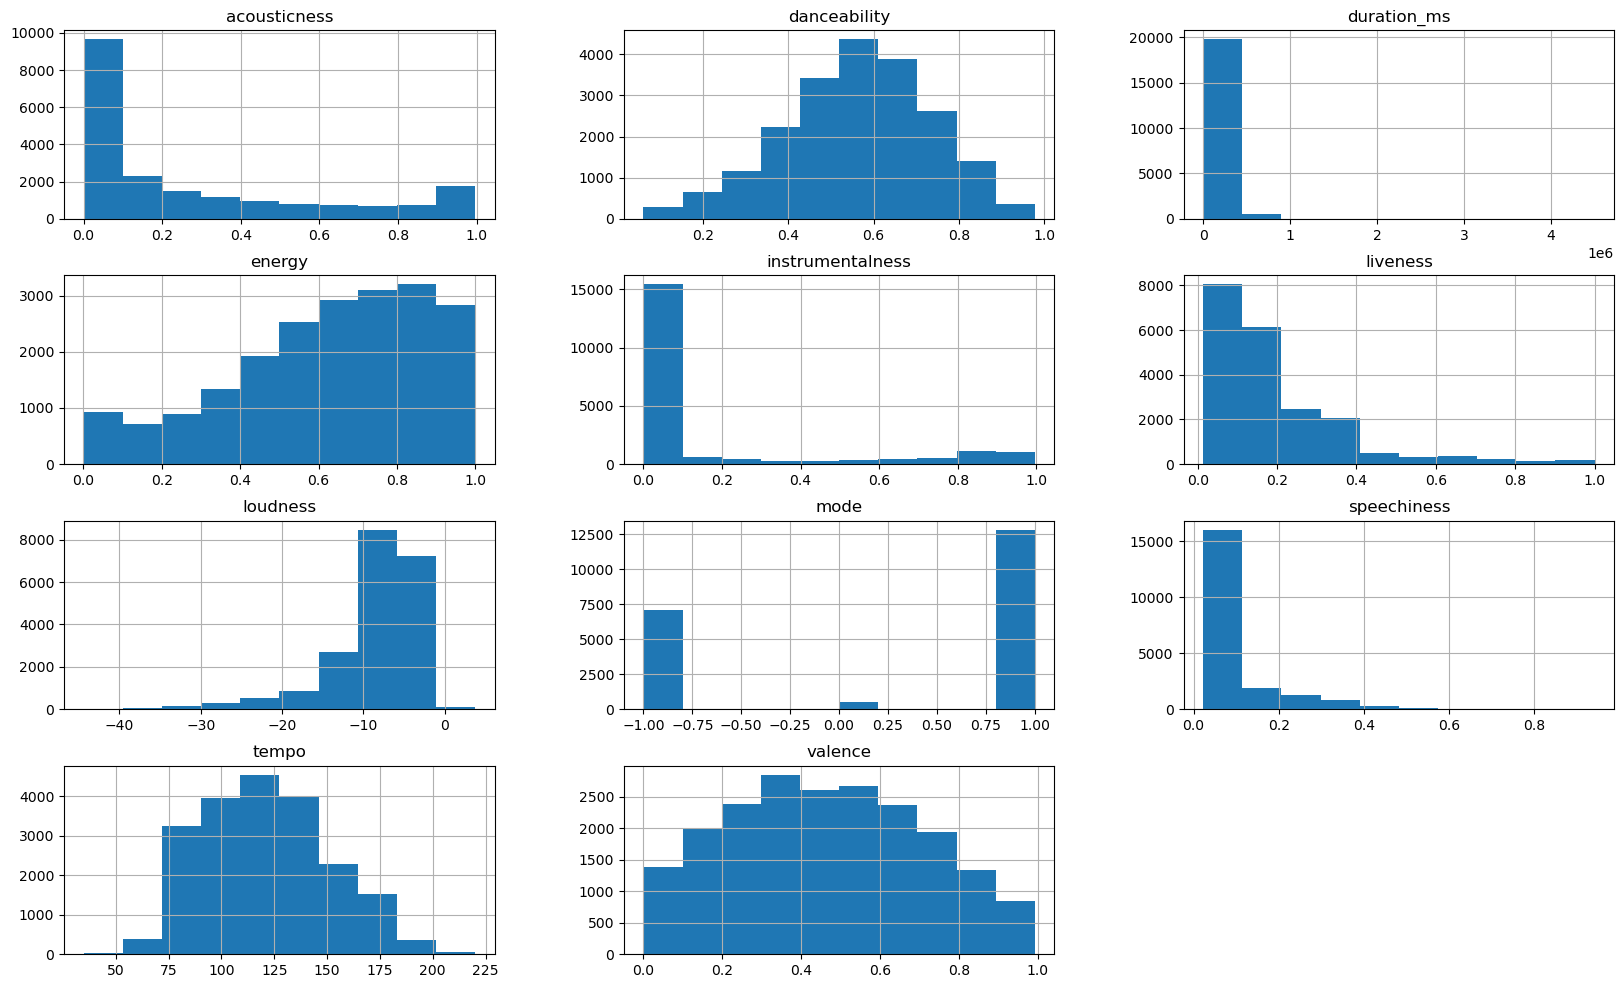

In [99]:
data.hist(figsize=(20, 12));

[Text(0, 0, 'track_name'),
 Text(1, 0, 'acousticness'),
 Text(2, 0, 'danceability'),
 Text(3, 0, 'duration_ms'),
 Text(4, 0, 'energy'),
 Text(5, 0, 'instrumentalness'),
 Text(6, 0, 'key'),
 Text(7, 0, 'liveness'),
 Text(8, 0, 'loudness'),
 Text(9, 0, 'mode'),
 Text(10, 0, 'speechiness'),
 Text(11, 0, 'tempo'),
 Text(12, 0, 'valence'),
 Text(13, 0, 'music_genre')]

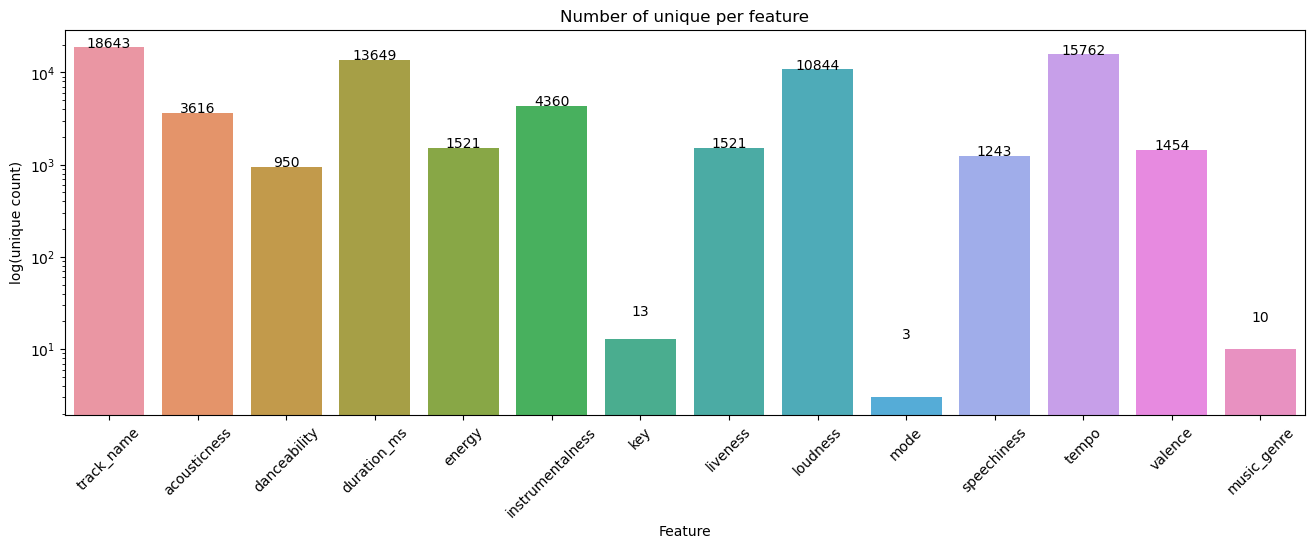

In [100]:
plt.figure(figsize=(16,5))
cols = data.columns
uniques = [len(data[col].unique()) for col in cols]

ax = sns.barplot(x=cols, y=uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique per feature')

for p, uniq in zip(ax.patches, uniques):
    ax.text(p.get_x() + p.get_width()/2.,
            uniq+10,
            uniq,
            ha='center')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [101]:
data['acousticness'].describe()

count    20393.000000
mean         0.274788
std          0.321651
min          0.000000
25%          0.015200
50%          0.120000
75%          0.470000
max          0.996000
Name: acousticness, dtype: float64

In [102]:
data['danceability'].describe()

count    20393.000000
mean         0.561983
std          0.171902
min          0.060000
25%          0.451000
50%          0.570000
75%          0.683000
max          0.978000
Name: danceability, dtype: float64

In [103]:
data['duration_ms'].describe()

count    2.039300e+04
mean     2.203770e+05
std      1.267312e+05
min     -1.000000e+00
25%      1.775170e+05
50%      2.195330e+05
75%      2.660000e+05
max      4.497994e+06
Name: duration_ms, dtype: float64

In [104]:
data.loc[data['duration_ms'] <0, 'duration_ms'] = data['duration_ms'] * (-1)

Text(0.5, 1.0, 'Уровень аккустичности для классической музыки и рока')

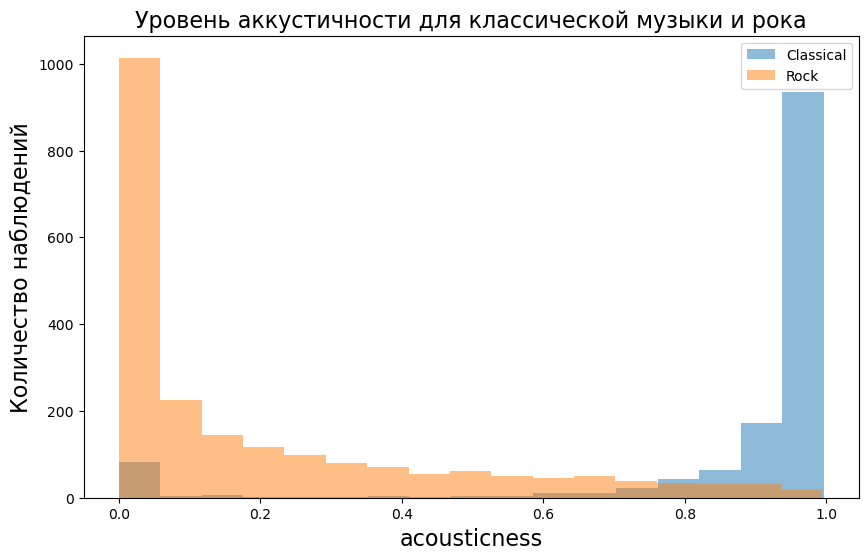

In [105]:
bins = 17

plt.figure(figsize = (10,6))
 
plt.hist(data.loc[data['music_genre'] == 'Classical', 'acousticness'], bins, alpha = 0.5, label = 'Classical')

plt.hist(data.loc[data['music_genre'] == 'Rock', 'acousticness'], bins, alpha = 0.5, label = 'Rock')
plt.legend(loc = 'upper right')

plt.xlabel('acousticness', fontsize = 16)
plt.ylabel('Количество наблюдений', fontsize = 16)
plt.title('Уровень аккустичности для классической музыки и рока', fontsize = 16)

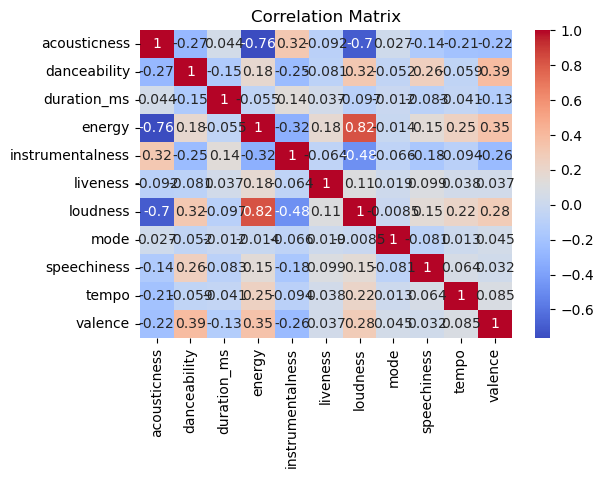

In [106]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [107]:
def grafik(x):
    x1 = list(data[data['music_genre'] == 'Country'][x])
    x2 = list(data[data['music_genre'] == 'Rock'][x])
    x3 = list(data[data['music_genre'] == 'Alternative'][x])
    x4 = list(data[data['music_genre'] == 'Hip-Hop'][x])
    x5 = list(data[data['music_genre'] == 'Blues'][x])
    x6 = list(data[data['music_genre'] == 'Jazz'][x])
    x7 = list(data[data['music_genre'] == 'Electronic'][x])
    x8 = list(data[data['music_genre'] == 'Anime'][x])
    x9 = list(data[data['music_genre'] == 'Rap'][x])
    x10 = list(data[data['music_genre'] == 'Classical'][x])

    colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', '#00FFFF', '#DC143C', '#7FFF00', '#5F9EA0', '#DEB887']
    names = ['Country', 'Rock', 'Alternative',
             'Hip-Hop', 'Blues','Jazz', 'Electronic', 'Anime', 'Rap', 'Classical']

    plt.hist([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10], bins = int(180/15), 
             color = colors, label=names)

Text(0.5, 1.0, 'Зависимость жанра от энергичности')

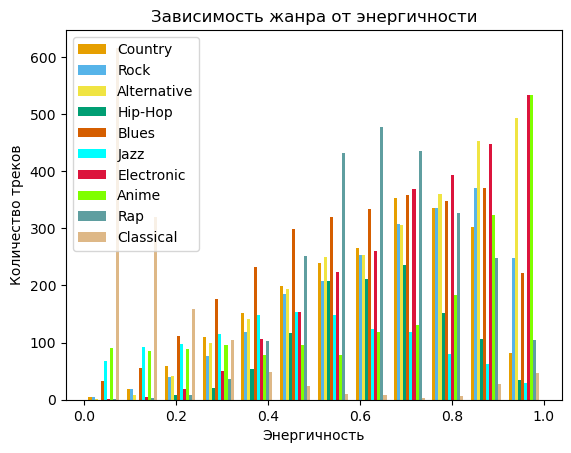

In [108]:
grafik('energy')
plt.legend()
plt.xlabel('Энергичность')
plt.ylabel('Количество треков')
plt.title('Зависимость жанра от энергичности')

Text(0.5, 1.0, 'Зависимость жанра от аккустичности')

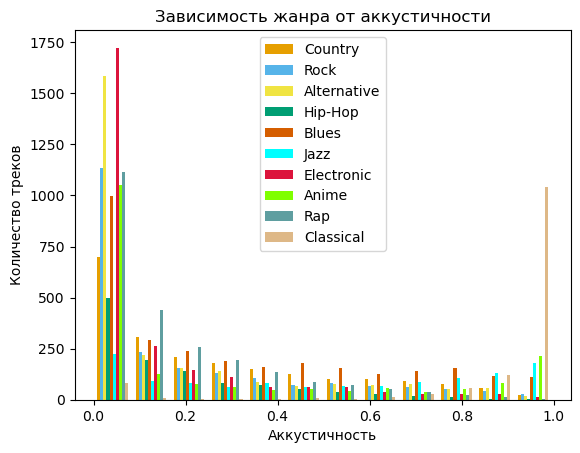

In [109]:
grafik('acousticness')
plt.legend()
plt.xlabel('Аккустичность')
plt.ylabel('Количество треков')
plt.title('Зависимость жанра от аккустичности')

Text(0.5, 1.0, 'Зависимость жанра от танцевальности')

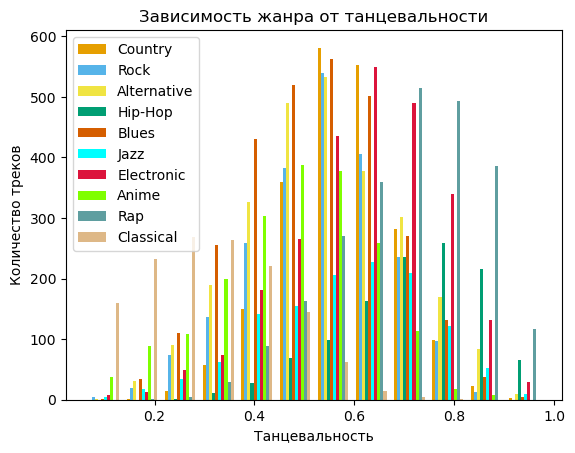

In [110]:
grafik('danceability')
plt.legend()
plt.xlabel('Танцевальность')
plt.ylabel('Количество треков')
plt.title('Зависимость жанра от танцевальности')

Text(0.5, 1.0, 'Зависимость жанра от длины трека')

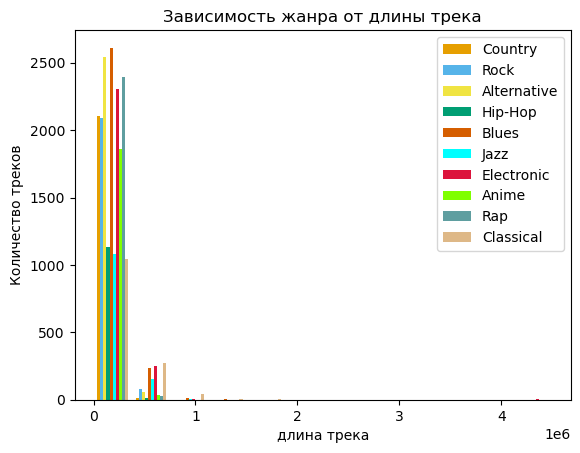

In [111]:
grafik('duration_ms')

plt.legend()
plt.xlabel('длина трека')
plt.ylabel('Количество треков')
plt.title('Зависимость жанра от длины трека')

Text(0.5, 1.0, 'Зависимость жанра от инструментальности')

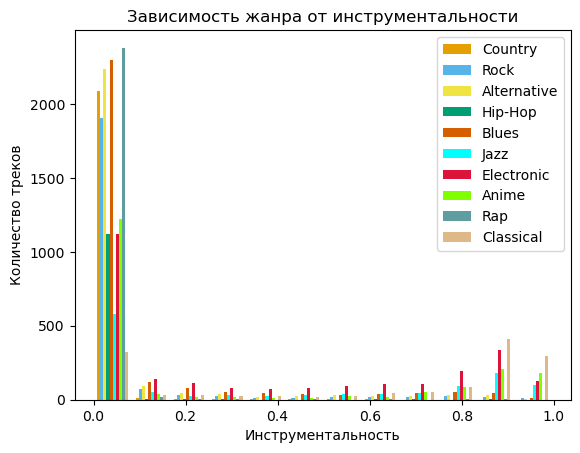

In [112]:
grafik('instrumentalness')

plt.legend()
plt.xlabel('Инструментальность')
plt.ylabel('Количество треков')
plt.title('Зависимость жанра от инструментальности')

Text(0.5, 1.0, 'Зависимость жанра от тональности')

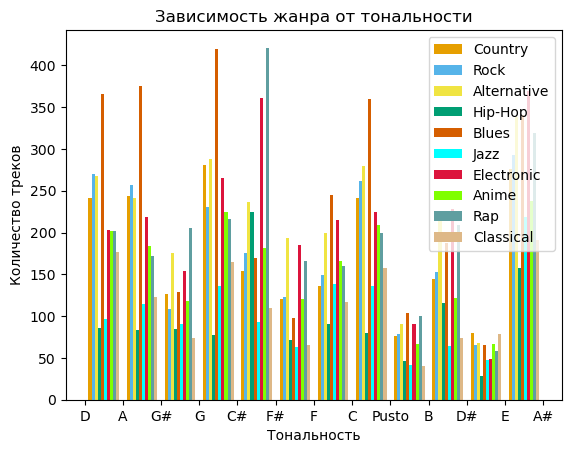

In [113]:
grafik('key')

plt.legend()
plt.xlabel('Тональность')
plt.ylabel('Количество треков')
plt.title('Зависимость жанра от тональности')

Text(0.5, 1.0, 'Зависимость жанра от привлекательности трека')

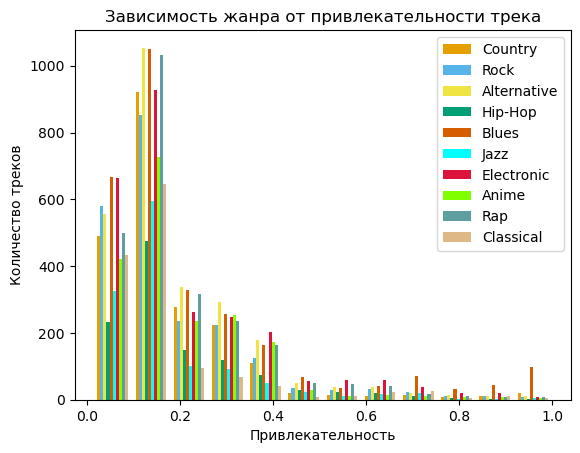

In [114]:
grafik('liveness')

plt.legend()
plt.xlabel('Привлекательность')
plt.ylabel('Количество треков')
plt.title('Зависимость жанра от привлекательности трека')

Text(0.5, 1.0, 'Зависимость жанра от громкости')

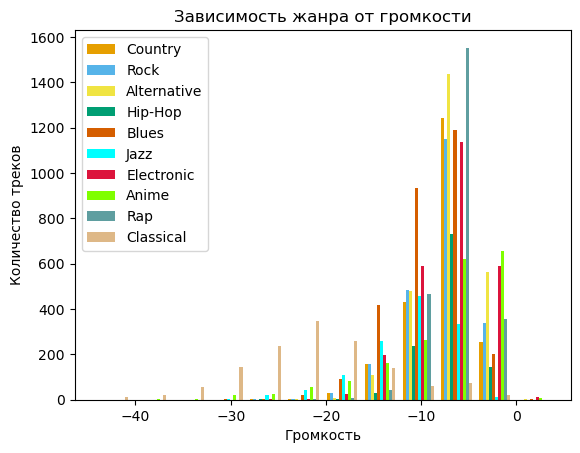

In [115]:
grafik('loudness')

plt.legend()
plt.xlabel('Громкость')
plt.ylabel('Количество треков')
plt.title('Зависимость жанра от громкости')

Text(0.5, 1.0, 'Зависимость жанра от наклонения')

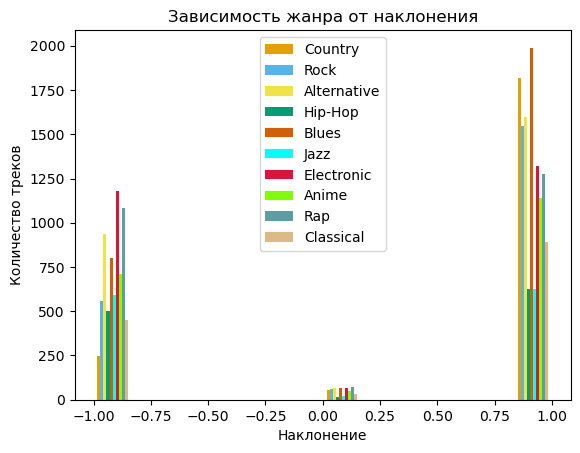

In [116]:
grafik('mode')
plt.legend()
plt.xlabel('Наклонение')
plt.ylabel('Количество треков')
plt.title('Зависимость жанра от наклонения')

Text(0.5, 1.0, 'Зависимость жанра от выразительности')

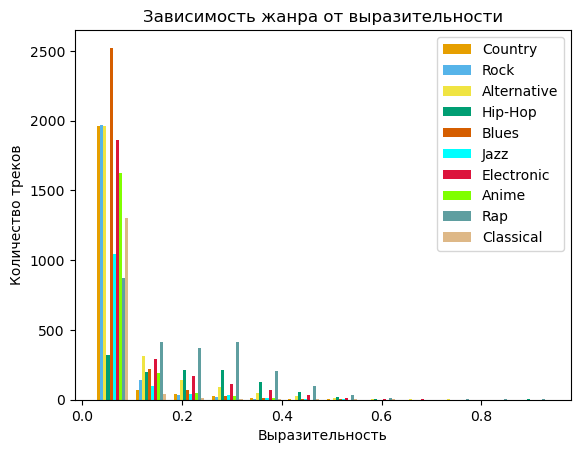

In [117]:
grafik('speechiness')
plt.legend()
plt.xlabel('Выразительность')
plt.ylabel('Количество треков')
plt.title('Зависимость жанра от выразительности')

Text(0.5, 1.0, 'Зависимость жанра от темпа')

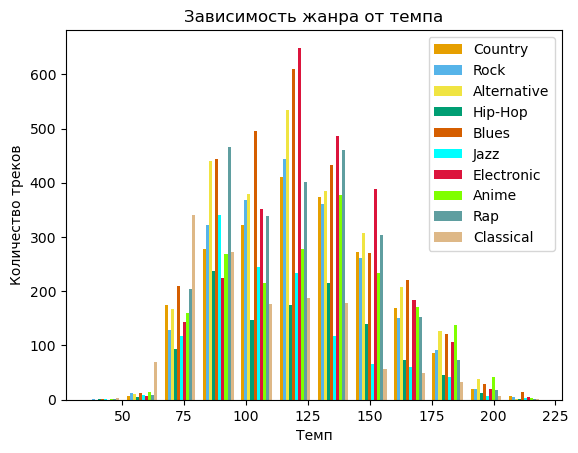

In [118]:
grafik('tempo')
plt.legend()
plt.xlabel('Темп')
plt.ylabel('Количество треков')
plt.title('Зависимость жанра от темпа')

Text(0.5, 1.0, 'Зависимость жанра от привлекательности для пользователей')

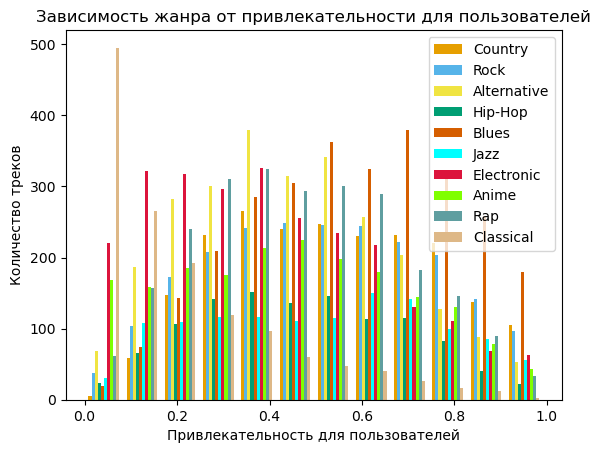

In [119]:
grafik('valence')
plt.legend()
plt.xlabel('Привлекательность для пользователей')
plt.ylabel('Количество треков')
plt.title('Зависимость жанра от привлекательности для пользователей')

Вывод: На основании графиков можно выделить следующие наиболее существенные признаки: acousticness (особенно для классики), danceability, energy, mode. Также выделяются признаки key и speechiness для жанра рэп.

Обучение

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20393 entries, 0 to 20393
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        20393 non-null  object 
 1   acousticness      20393 non-null  float64
 2   danceability      20393 non-null  float64
 3   duration_ms       20393 non-null  float64
 4   energy            20393 non-null  float64
 5   instrumentalness  20393 non-null  float64
 6   key               20393 non-null  object 
 7   liveness          20393 non-null  float64
 8   loudness          20393 non-null  float64
 9   mode              20393 non-null  int64  
 10  speechiness       20393 non-null  float64
 11  tempo             20393 non-null  float64
 12  valence           20393 non-null  float64
 13  music_genre       20393 non-null  object 
dtypes: float64(10), int64(1), object(3)
memory usage: 2.8+ MB


In [121]:
obuchenie_cat_boost2_rs(data,100, 0, 6)

Learning rate set to 0.091235
0:	learn: 2.1981915	total: 72.9ms	remaining: 1m 12s
1:	learn: 2.1173325	total: 144ms	remaining: 1m 11s
2:	learn: 2.0495871	total: 219ms	remaining: 1m 12s
3:	learn: 1.9983184	total: 295ms	remaining: 1m 13s
4:	learn: 1.9564618	total: 368ms	remaining: 1m 13s
5:	learn: 1.9215314	total: 444ms	remaining: 1m 13s
6:	learn: 1.8817548	total: 521ms	remaining: 1m 13s
7:	learn: 1.8480941	total: 595ms	remaining: 1m 13s
8:	learn: 1.8187263	total: 675ms	remaining: 1m 14s
9:	learn: 1.7964127	total: 751ms	remaining: 1m 14s
10:	learn: 1.7737536	total: 830ms	remaining: 1m 14s
11:	learn: 1.7524988	total: 909ms	remaining: 1m 14s
12:	learn: 1.7324252	total: 989ms	remaining: 1m 15s
13:	learn: 1.7141612	total: 1.06s	remaining: 1m 14s
14:	learn: 1.7006386	total: 1.14s	remaining: 1m 15s
15:	learn: 1.6851457	total: 1.22s	remaining: 1m 15s
16:	learn: 1.6716384	total: 1.29s	remaining: 1m 14s
17:	learn: 1.6561674	total: 1.37s	remaining: 1m 14s
18:	learn: 1.6470061	total: 1.45s	remaining

158:	learn: 1.3037026	total: 12.6s	remaining: 1m 6s
159:	learn: 1.3032719	total: 12.7s	remaining: 1m 6s
160:	learn: 1.3017492	total: 12.7s	remaining: 1m 6s
161:	learn: 1.3007181	total: 12.8s	remaining: 1m 6s
162:	learn: 1.2998152	total: 12.9s	remaining: 1m 6s
163:	learn: 1.2985427	total: 13s	remaining: 1m 6s
164:	learn: 1.2979185	total: 13.1s	remaining: 1m 6s
165:	learn: 1.2968160	total: 13.1s	remaining: 1m 5s
166:	learn: 1.2954843	total: 13.2s	remaining: 1m 5s
167:	learn: 1.2938787	total: 13.3s	remaining: 1m 5s
168:	learn: 1.2932703	total: 13.4s	remaining: 1m 5s
169:	learn: 1.2926445	total: 13.5s	remaining: 1m 5s
170:	learn: 1.2914348	total: 13.5s	remaining: 1m 5s
171:	learn: 1.2901840	total: 13.6s	remaining: 1m 5s
172:	learn: 1.2883845	total: 13.7s	remaining: 1m 5s
173:	learn: 1.2868764	total: 13.8s	remaining: 1m 5s
174:	learn: 1.2856437	total: 13.8s	remaining: 1m 5s
175:	learn: 1.2839546	total: 13.9s	remaining: 1m 5s
176:	learn: 1.2826495	total: 14s	remaining: 1m 5s
177:	learn: 1.28

320:	learn: 1.1758477	total: 25.5s	remaining: 54s
321:	learn: 1.1751298	total: 25.6s	remaining: 53.9s
322:	learn: 1.1741426	total: 25.7s	remaining: 53.8s
323:	learn: 1.1734525	total: 25.8s	remaining: 53.7s
324:	learn: 1.1728927	total: 25.8s	remaining: 53.7s
325:	learn: 1.1720197	total: 25.9s	remaining: 53.6s
326:	learn: 1.1710109	total: 26s	remaining: 53.5s
327:	learn: 1.1701846	total: 26.1s	remaining: 53.4s
328:	learn: 1.1699422	total: 26.1s	remaining: 53.3s
329:	learn: 1.1696063	total: 26.2s	remaining: 53.3s
330:	learn: 1.1688091	total: 26.3s	remaining: 53.2s
331:	learn: 1.1681739	total: 26.4s	remaining: 53.1s
332:	learn: 1.1676180	total: 26.5s	remaining: 53s
333:	learn: 1.1669671	total: 26.6s	remaining: 53s
334:	learn: 1.1667094	total: 26.6s	remaining: 52.9s
335:	learn: 1.1662909	total: 26.7s	remaining: 52.8s
336:	learn: 1.1651310	total: 26.8s	remaining: 52.7s
337:	learn: 1.1639983	total: 26.9s	remaining: 52.7s
338:	learn: 1.1636169	total: 27s	remaining: 52.6s
339:	learn: 1.1626921	

479:	learn: 1.0818837	total: 38.3s	remaining: 41.5s
480:	learn: 1.0812611	total: 38.4s	remaining: 41.4s
481:	learn: 1.0806974	total: 38.5s	remaining: 41.3s
482:	learn: 1.0798276	total: 38.5s	remaining: 41.3s
483:	learn: 1.0790781	total: 38.6s	remaining: 41.2s
484:	learn: 1.0785530	total: 38.7s	remaining: 41.1s
485:	learn: 1.0780123	total: 38.8s	remaining: 41s
486:	learn: 1.0772471	total: 38.9s	remaining: 40.9s
487:	learn: 1.0768414	total: 38.9s	remaining: 40.9s
488:	learn: 1.0762446	total: 39s	remaining: 40.8s
489:	learn: 1.0759086	total: 39.1s	remaining: 40.7s
490:	learn: 1.0752277	total: 39.2s	remaining: 40.6s
491:	learn: 1.0746372	total: 39.3s	remaining: 40.5s
492:	learn: 1.0743593	total: 39.4s	remaining: 40.5s
493:	learn: 1.0735703	total: 39.4s	remaining: 40.4s
494:	learn: 1.0730476	total: 39.5s	remaining: 40.3s
495:	learn: 1.0719882	total: 39.6s	remaining: 40.2s
496:	learn: 1.0711413	total: 39.7s	remaining: 40.2s
497:	learn: 1.0702637	total: 39.8s	remaining: 40.1s
498:	learn: 1.06

638:	learn: 0.9998387	total: 51.1s	remaining: 28.9s
639:	learn: 0.9991493	total: 51.2s	remaining: 28.8s
640:	learn: 0.9987031	total: 51.3s	remaining: 28.7s
641:	learn: 0.9980452	total: 51.4s	remaining: 28.7s
642:	learn: 0.9977109	total: 51.5s	remaining: 28.6s
643:	learn: 0.9971364	total: 51.5s	remaining: 28.5s
644:	learn: 0.9967712	total: 51.6s	remaining: 28.4s
645:	learn: 0.9961872	total: 51.7s	remaining: 28.3s
646:	learn: 0.9955862	total: 51.8s	remaining: 28.2s
647:	learn: 0.9950686	total: 51.8s	remaining: 28.2s
648:	learn: 0.9947207	total: 51.9s	remaining: 28.1s
649:	learn: 0.9941263	total: 52s	remaining: 28s
650:	learn: 0.9935126	total: 52.1s	remaining: 27.9s
651:	learn: 0.9928776	total: 52.2s	remaining: 27.8s
652:	learn: 0.9923657	total: 52.2s	remaining: 27.8s
653:	learn: 0.9920472	total: 52.3s	remaining: 27.7s
654:	learn: 0.9916637	total: 52.4s	remaining: 27.6s
655:	learn: 0.9911058	total: 52.5s	remaining: 27.5s
656:	learn: 0.9904973	total: 52.6s	remaining: 27.4s
657:	learn: 0.99

800:	learn: 0.9204829	total: 1m 4s	remaining: 16s
801:	learn: 0.9196685	total: 1m 4s	remaining: 15.9s
802:	learn: 0.9190824	total: 1m 4s	remaining: 15.8s
803:	learn: 0.9189328	total: 1m 4s	remaining: 15.7s
804:	learn: 0.9188232	total: 1m 4s	remaining: 15.7s
805:	learn: 0.9179246	total: 1m 4s	remaining: 15.6s
806:	learn: 0.9173000	total: 1m 4s	remaining: 15.5s
807:	learn: 0.9171456	total: 1m 4s	remaining: 15.4s
808:	learn: 0.9164345	total: 1m 4s	remaining: 15.3s
809:	learn: 0.9158492	total: 1m 5s	remaining: 15.3s
810:	learn: 0.9154100	total: 1m 5s	remaining: 15.2s
811:	learn: 0.9150611	total: 1m 5s	remaining: 15.1s
812:	learn: 0.9145075	total: 1m 5s	remaining: 15s
813:	learn: 0.9142101	total: 1m 5s	remaining: 14.9s
814:	learn: 0.9139527	total: 1m 5s	remaining: 14.8s
815:	learn: 0.9136126	total: 1m 5s	remaining: 14.8s
816:	learn: 0.9133853	total: 1m 5s	remaining: 14.7s
817:	learn: 0.9131171	total: 1m 5s	remaining: 14.6s
818:	learn: 0.9128674	total: 1m 5s	remaining: 14.5s
819:	learn: 0.91

959:	learn: 0.8459588	total: 1m 17s	remaining: 3.22s
960:	learn: 0.8453750	total: 1m 17s	remaining: 3.14s
961:	learn: 0.8449371	total: 1m 17s	remaining: 3.06s
962:	learn: 0.8445303	total: 1m 17s	remaining: 2.98s
963:	learn: 0.8441907	total: 1m 17s	remaining: 2.9s
964:	learn: 0.8436481	total: 1m 17s	remaining: 2.82s
965:	learn: 0.8432470	total: 1m 17s	remaining: 2.74s
966:	learn: 0.8429621	total: 1m 17s	remaining: 2.66s
967:	learn: 0.8426364	total: 1m 17s	remaining: 2.58s
968:	learn: 0.8421522	total: 1m 18s	remaining: 2.5s
969:	learn: 0.8416116	total: 1m 18s	remaining: 2.42s
970:	learn: 0.8409650	total: 1m 18s	remaining: 2.33s
971:	learn: 0.8406803	total: 1m 18s	remaining: 2.25s
972:	learn: 0.8402977	total: 1m 18s	remaining: 2.17s
973:	learn: 0.8393430	total: 1m 18s	remaining: 2.09s
974:	learn: 0.8388349	total: 1m 18s	remaining: 2.01s
975:	learn: 0.8381455	total: 1m 18s	remaining: 1.93s
976:	learn: 0.8371979	total: 1m 18s	remaining: 1.85s
977:	learn: 0.8365523	total: 1m 18s	remaining: 1